# AIR POLLUTION ANALYSIS USING DATA ANALYTICS TECHNIQUES
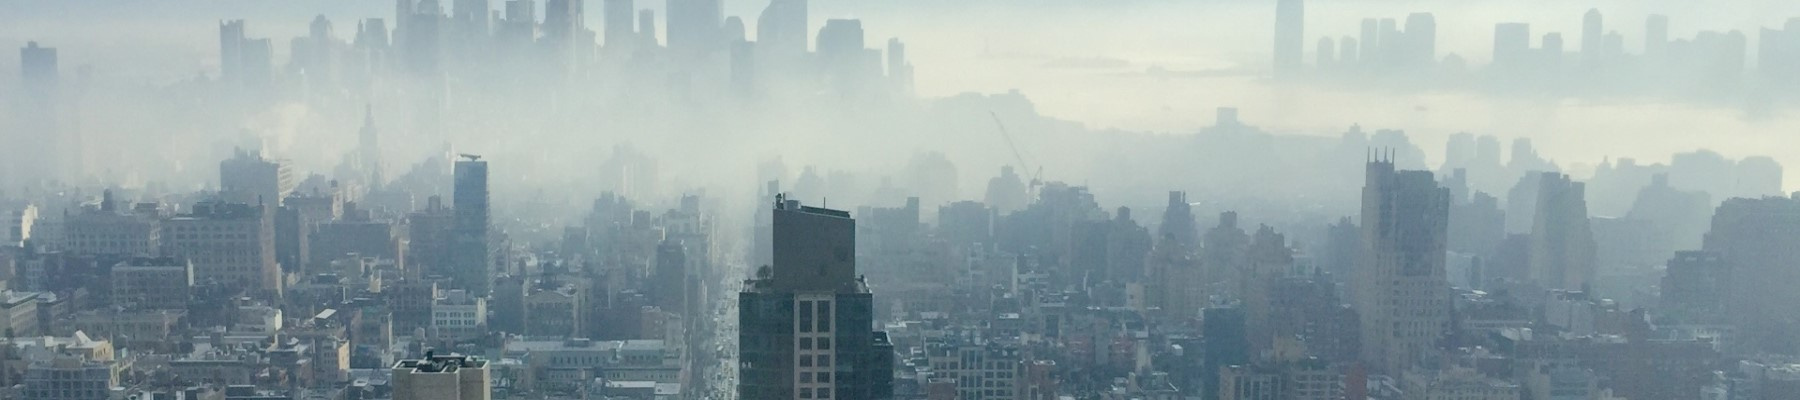

**Air pollution analysis is an important way to monitor and control the air quality evaluation. The characteristics of air 
supply affect its suitability for a specific use. A few air pollutants, called criteria air pollutants, are common throughout
the United State. These pollutants can injure health, harm the environment and cause property damage.**

# Data Set Information:

 **The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 values.**

# Step 1 Importing Libraries

In [3]:
# Importing Labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
#from pandas_visual_analysis import VisualAnalysis
import pandas.util.testing as tm

# Step 2 Loading Dataset

In [4]:
#reading the dataset file using pandas
Data = pd.read_excel('AirQualityUCI.xlsx')

In [6]:
# printing the first 5 row of the Dataset
Data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [7]:
# Printing the last 5 rows of the Dataset
Data.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
9352 2005-04-04  10:00:00     3.1      1314.25      -200  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50      -200  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00      -200  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50      -200   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75      -200  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T      RH        AH  
9352      1728.50  21.850  29.250  0.756824  
9353      1269.00  24.325  23.725  0.711864  
9354      1092.00  26.900  18.350  0.640649  
9355       769.75  28.325  13.550  0.513866  
9356       816.00  28.500  13.125  0.502804

In [5]:
# shows number of row and column in the dataset
Data.shape

(9357, 15)

In [6]:
# generate descriptive statistics of the Dataset
Data.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.192382   456.922728   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.750000   699.750000   
50%     141.000000    794.250000    96.000000   1445.500000   942.000000   
75%     284.200000    960.250000   133.000000   1662.000000  1255.250000   
max    1479.000000   2682.750000   339.700000   2775.000000  2522.750000   

                 T           RH           AH  
count  9357.000000  9357.000000  9357.000000  
mean      9.776600    39.483611    -6.837604  
std      43.203438    51.215645    38.976670  
min    -200.000000  -200.000000  -200.000000  
25%      10.950000    34.050000     0.692275  
50%      17.200000    48.550000     0.976823  
75%      24.075000    61.875000     1.296223  
max      44.600000    88.725000     2.231036

In [7]:
# information about dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

# Step 3 Data Pre Processing

**Pre-processing refer to the transformantions applied to your data befour feeding it to the Machine Learning algorithm. Which affects the accuracy of final outcome in Python, scikit-learn has a prebuilt functionality under sklearn preprocessing. Pandas library also offer capabilities. They are many more option for pre-processing which we'll explore.**

## Dealing with missing data

In [8]:
#checking and counting for missing data points for each column
Data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

## Deleting missing values

In [8]:
#R emove missing values
DataCleaned = Data.dropna()
DataCleaned.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [9]:
# Finding out mode value for color column
ModeValueForColor = Data['CO(GT)'].mode()[0]
print('Mode value for COGT column is: ',ModeValueForColor)

Mode value for COGT column is:  -200.0


In [11]:
# Now we can see all column have zero missing values
print(Data.isnull().sum())
print(Data.info())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null 

In [12]:
# Return object containing counts of unique value
Data['CO(GT)'].value_counts()

-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 7.6         1
 9.9         1
 11.5        1
 9.4         1
 11.9        1
Name: CO(GT), Length: 97, dtype: int64

In [13]:
# Find columns name air quality is working as data frame
Data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

## Data Pre-processing

In [14]:
#datatype of eachattribute
Data.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [15]:
# Finding -200 Using Simple FOR LOOP which can also be done with VALUE_COUNTS and then replaced
l = []
for i in range(len(Data.columns)):
    f = Data.columns[i]
    count = 0
    for j in range(len(Data[f])):
        if Data[f][j] == -200:
            count += 1
    l.append((f,count))
    print("Values for each column that needs to be replaced with avg \n",l)

Values for each column that needs to be replaced with avg 
 [('Date', 0)]
Values for each column that needs to be replaced with avg 
 [('Date', 0), ('Time', 0)]
Values for each column that needs to be replaced with avg 
 [('Date', 0), ('Time', 0), ('CO(GT)', 1683)]
Values for each column that needs to be replaced with avg 
 [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366)]
Values for each column that needs to be replaced with avg 
 [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443)]
Values for each column that needs to be replaced with avg 
 [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443), ('C6H6(GT)', 366)]
Values for each column that needs to be replaced with avg 
 [('Date', 0), ('Time', 0), ('CO(GT)', 1683), ('PT08.S1(CO)', 366), ('NMHC(GT)', 8443), ('C6H6(GT)', 366), ('PT08.S2(NMHC)', 366)]
Values for each column that needs to be replaced with avg 
 [('Date', 0), ('Time', 0), ('CO(GT)', 1683),

In [16]:
num = Data._get_numeric_data()
num[num < 0] = 0
Data

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25         0  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50         0  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00         0  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50         0   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75         0  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045.50    166.0       1056.25    113.0       1692.00   
1            954.75    103.0       1173.75     92.0       1558.75   
2            939.25    131.0       1140.00    114.0       1554.50   
3            948.25    172.0       1092.00    122.0       1583.75   
4            835.50    131.0       1205.00    116.0       1490.00   
...             ...      ...           ...      ...           ...   
9352        1101.25    471.7        538.50    189.8       1374.25   
9353        1027.00    353.3        603.75    179.2       1263.50   
9354        1062.50    293.0        603.25    174.7       1240.75   
9355         960.50    234.5        701.50    155.7       1041.00   
9356        1047.25    265.2        654.00    167.7       1128.50   

      PT08.S5(O3)       T         RH        AH  
0         1267.50  13.600  48.875001  0.757754  
1          972.25  13.300  47.700000  0.725487  
2         1074.00  11.900  53.975000  0.750239  
3         1203.25  11.000  60.000000  0.786713  
4         1110.00  11.150  59.575001  0.788794  
...           ...     ...        ...       ...  
9352      1728.50  21.850  29.250000  0.756824  
9353      1269.00  24.325  23.725000  0.711864  
9354      1092.00  26.900  18.350000  0.640649  
9355       769.75  28.325  13.550000  0.513866  
9356       816.00  28.500  13.125000  0.502804  

[9357 rows x 15 columns]

In [17]:
# i.e all -200 are replaced wit 0
Data['CO(GT)'].value_counts()

0.0     1683
1.0      305
1.4      279
1.6      275
1.5      273
        ... 
11.5       1
10.1       1
9.3        1
9.5        1
11.9       1
Name: CO(GT), Length: 97, dtype: int64

## Exploration

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9352    3.1
9353    2.4
9354    2.4
9355    2.1
9356    2.2
Name: CO(GT), Length: 9357, dtype: float64


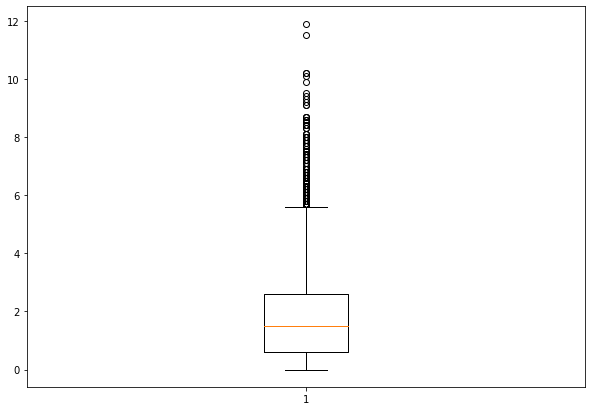

In [18]:
# Outlier in Dataset is just -200
# CReating dataset
np.random.seed(10)
data = Data['CO(GT)']
print(data)
fig = plt.figure(figsize = (10, 7))

# Creating Plot
plt.boxplot(data)

#show plot
plt.show()